In [1]:
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Have a try with fashion-mnist

mnist 数据集被用烂了，连 Lan Goddfellow 都提倡放弃 minist，而且大多数 mnist 只需要一个像素都能够区分。最近出来的 Fashion-mnist 就弥补了 mnist 数据集很多不足。

### Load data

In [2]:
%pwd

'/home/paperspace/projects/fashion-mnist-example'

In [3]:
from mnist_reader import load_mnist

x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')

In [4]:
print('Training data: {}'.format(x_train.shape)) 
print('Testing data: {}'.format(x_test.shape))

Training data: (60000, 784)
Testing data: (10000, 784)


In [5]:
Image.fromarray(x_train[0, :].reshape((28, 28)))

In [6]:
Image.fromarray(x_train[1, :].reshape((28, 28)))

In [7]:
from keras.utils import to_categorical

x_train = x_train.astype(np.float32)
x_train /= 255.
x_train = x_train.reshape((-1, 28, 28, 1))

x_test = x_test.astype(np.float32)
x_test /= 255.
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Using TensorFlow backend.


### Build Model

In [8]:
img_height, img_width = 28, 28
input_shape = (img_height, img_width, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 padding='same',
                 activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
          
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
          
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       73856     
__________

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, 
                    batch_size=64, 
                    epochs=10, 
                    validation_split=0.2, 
                    shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 138s - loss: 0.4478 - acc: 0.8386 - val_loss: 0.2993 - val_acc: 0.8845
Epoch 2/10
48000/48000 [==============================] - 133s - loss: 0.2841 - acc: 0.8975 - val_loss: 0.2462 - val_acc: 0.9121
Epoch 3/10
48000/48000 [==============================] - 132s - loss: 0.2363 - acc: 0.9139 - val_loss: 0.2360 - val_acc: 0.9137
Epoch 4/10
48000/48000 [==============================] - 132s - loss: 0.2070 - acc: 0.9241 - val_loss: 0.2394 - val_acc: 0.9196
Epoch 5/10
48000/48000 [==============================] - 132s - loss: 0.1786 - acc: 0.9350 - val_loss: 0.2571 - val_acc: 0.9121
Epoch 6/10
48000/48000 [==============================] - 132s - loss: 0.1577 - acc: 0.9419 - val_loss: 0.2349 - val_acc: 0.9261
Epoch 7/10
48000/48000 [==============================] - 132s - loss: 0.1385 - acc: 0.9497 - val_loss: 0.2311 - val_acc: 0.9257
Epoch 8/10
48000/48000 [=======================

In [14]:
model.evaluate(x_test, y_test)

 9984/10000 [============================>.] - ETA: 0s

[0.25076979839801788, 0.92330000000000001]

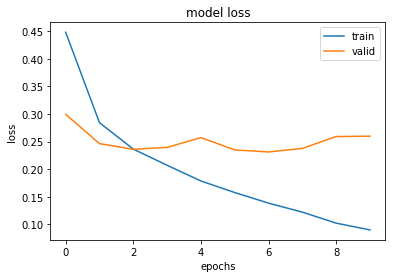

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.title('model loss')

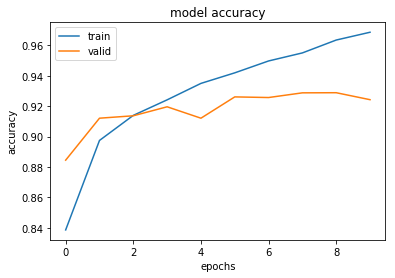

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'valid'])
plt.title('model accuracy')

### Save model

In [17]:
# 所有配置都序列化
model.save('mode.h5')